In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
digit_data = pd.read_csv('digit_train.csv')
digit_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 42000개 손글씨 데이터
# 정답포함해서 785개의 컬럼이 있음
# 정답 제외 784개 컬럼이 존재 =28*28 = 784
digit_data.shape

(42000, 785)

In [4]:
img0 = digit_data.iloc[0, 1:]

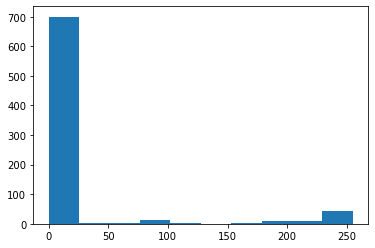

In [7]:
plt.hist(img0)
plt.show()

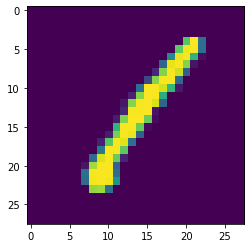

In [8]:
plt.imshow(img0.values.reshape(28,28))
plt.show()

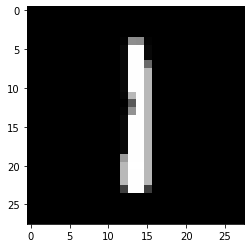

In [10]:
# 2번 이미지 확인
img1 = digit_data.iloc[2, 1:]
plt.imshow(img1.values.reshape(28,28), cmap = "gray")
plt.show()

- 5000장 추출

In [12]:
X = digit_data.iloc[:5000, 1:]
y = digit_data.iloc[:5000, 0]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,
                                                   random_state = 3)

In [14]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(X_train, y_train)
print("train score : ", logi.score(X_train, y_train))
print("test score : ", logi.score(X_test, y_test))

train score :  1.0
test score :  0.8573333333333333


C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)
print("train score : ", svc.score(X_train, y_train))
print("test score : ", svc.score(X_test, y_test))

train score :  0.9957142857142857
test score :  0.83


C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [19]:
# 50 : 2
# 51 : 1
logi.predict_proba(X_test[50:52])

array([[1.17481376e-55, 6.22494889e-31, 1.00000000e+00, 5.00447486e-40,
        3.00015210e-60, 9.14324093e-50, 7.88925999e-58, 1.77347006e-88,
        3.20842665e-29, 8.90047010e-65],
       [4.41194556e-76, 1.00000000e+00, 1.66341265e-16, 1.63544408e-23,
        1.73327541e-57, 1.55998713e-20, 4.91663195e-26, 2.46789457e-38,
        1.90356809e-13, 2.32083197e-34]])

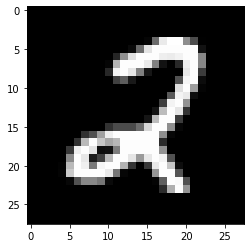

In [20]:
img50 = X_test.iloc[50]
plt.imshow(img50.values.reshape(28,28), cmap='gray')
plt.show()

In [21]:
pre_logi = logi.predict(X_test)
print(classification_report(pre_logi, y_test))

NameError: name 'classification_report' is not defined